In [ ]:
#Contagion
#https://contagion.readthedocs.io/en/latest/tutorial_ContactNetwork.html
#https://contagion.readthedocs.io/en/latest/apiref_ContactNetwork.html
# Unsure if this had complex contagion
#Epidemic on Network
#https://arxiv.org/pdf/2001.02436.pdf
#https://epidemicsonnetworks.readthedocs.io/en/latest/GettingStarted.html
#https://github.com/springer-math/Mathematics-of-Epidemics-on-Networks


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/CSH Network Simulation ") #changing working directory to google drive

In [ ]:
!pip install EoN
!pip install networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import EoN

In [ ]:
G=nx.barabasi_albert_graph(500, 5) #create a barabasi-albert graph.
#It is a preferential attachemnt network model with 500 is number of nodes and 5 is edges each new nodes comewith

In [ ]:
tmax = 20
iterations = 5 #run 5 simulations
tau = 0.1 #transmission rate
gamma = 1.0 #recovery rate
rho = 0.005 #random fraction initially infected

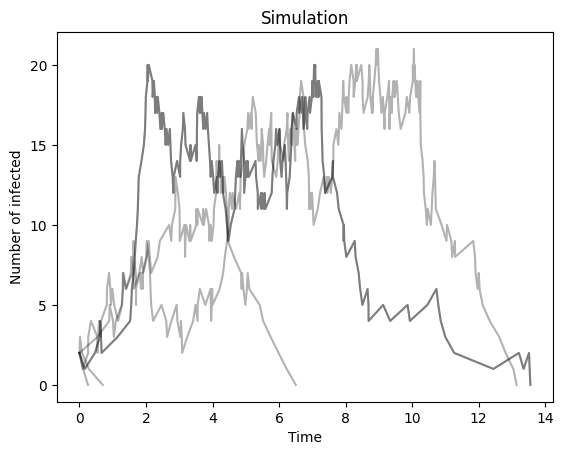

In [ ]:
#Simple Contagion SIR
for counter in range(iterations): #run simulations
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho=rho, tmax = tmax) #t = time, s= susceptible, i=infected, r=recovery
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
        plt.xlabel('Time')
        plt.ylabel('Number of infected')
        plt.title('Simulation')
        #plt.show()
    plt.plot(t, I, color = 'k', alpha=0.3)


Code for complex contagion.
Complex Contagion refer to n individual changing one stauts to another based on the current statuses of its neghbors. Please note that this complex contagion has no memory and is nnot based on previous interactions with someneighbors who may have since changed staus.

In [ ]:
# for Complex Contagion
#https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.Gillespie_complex_contagion.html#EoN.Gillespie_complex_contagion
#https://github.com/springer-math/Mathematics-of-Epidemics-on-Networks
#https://arxiv.org/pdf/2001.02436.pdf

In [ ]:
#This function needs to return the rate at which a node chnages status. For the model we are assuming, its returning 1 if the node has atleast 2 infected connection and O otherwise
# The threshold is provided in the tuple parameter
def transition_rate(G, node, status, parameters):
  r = parameters[0] #threshold
  if status[node]=="S" and len ([nbr for nbr in G.neighbors(node) if status[nbr]=="I"])>=r: #if a node is susceptible and have atleast "r" infected parameters.
    return 1
  else:
    return 0

In [ ]:
# Ths functions returns the new status of node. At this time, we are already calculating it in the last function.
# But this function can be expanded to include other transition status.
# for this model, S are turning to I and existing I remains I.
def transition_choice(G, node, status, parameters):
  return "I"

In [ ]:
#This function returns a set containing all the nodes who might chnage because of a node may have chnage its status. For example, if a S becomes I, then any node nears the I whcih is S might chnage.
# for this model only node a node might are affect are susceptibles neighbors.
def get_influence_set(G, node, status, parameters):
  return [nbr for nbr in G.neighbors(node) if status[nbr]=="S"]


In [ ]:
parameter = (2,)# This is the threshold.

In [ ]:
from collections import defaultdict
import numpy as np


0.0375
defaultdict(<function <lambda> at 0x7f1303ed4040>, {})
doing Gillespie simulation
done with simulation, now plotting
0.044642857142857144
defaultdict(<function <lambda> at 0x7f130c1d5240>, {})
doing Gillespie simulation
done with simulation, now plotting
0.05178571428571428
defaultdict(<function <lambda> at 0x7f130c1d5ab0>, {})
doing Gillespie simulation
done with simulation, now plotting
0.05892857142857143
defaultdict(<function <lambda> at 0x7f130c1d6950>, {})
doing Gillespie simulation
done with simulation, now plotting
0.06607142857142857
defaultdict(<function <lambda> at 0x7f130c1d4d30>, {})
doing Gillespie simulation
done with simulation, now plotting
0.0732142857142857
defaultdict(<function <lambda> at 0x7f130c1d48b0>, {})
doing Gillespie simulation
done with simulation, now plotting
0.08035714285714285
defaultdict(<function <lambda> at 0x7f130c1d5a20>, {})
doing Gillespie simulation
done with simulation, now plotting
0.0875
defaultdict(<function <lambda> at 0x7f130c43404

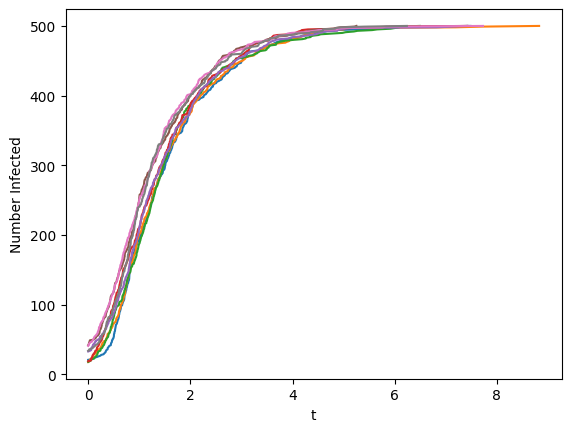

In [ ]:
for rho in np.linspace(3./80, 7./80, 8):
  print(rho) #varying rho help us figure out at what initial infection rate, the entire population can get infected.
  IC = defaultdict(lambda: "S")
  print(IC)
  for node in G.nodes():
    if np.random.random()<rho:
      IC[node] = "I"
  print("doing Gillespie simulation")
  t, S, I = EoN.Gillespie_complex_contagion(G, transition_rate,transition_choice, get_influence_set, IC, return_statuses = ("S", "I"),parameters = parameter)
  print("done with simulation, now plotting")
  plt.plot(t, I)
plt.xlabel("t")a graph ob
plt.ylabel("Number Infected")
plt.show()
